In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

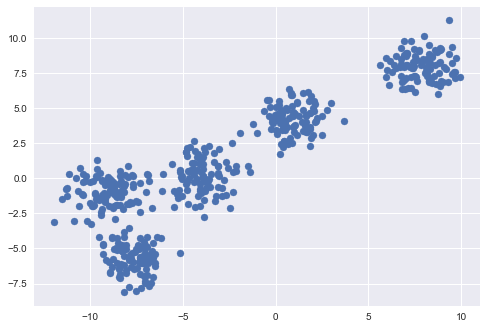

In [3]:
plt.style.use('seaborn')
plt.figure(0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [5]:
k = 5
color = ['green','red','blue','yellow','orange']
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    clusters[i] = cluster

In [10]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def assignToClusters(clusters):
    for ix in range(x.shape[0]):
        dist_ = []
        curr_x = x[ix]
        for kx in range(k):
            d = dist(curr_x,clusters[kx]['center'])
            dist_.append(d)
        current_cluster = np.argmin(dist_)
        clusters[current_cluster]['points'].append(curr_x)

def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

def plotClusters(clusters):
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="o")
    plt.show()

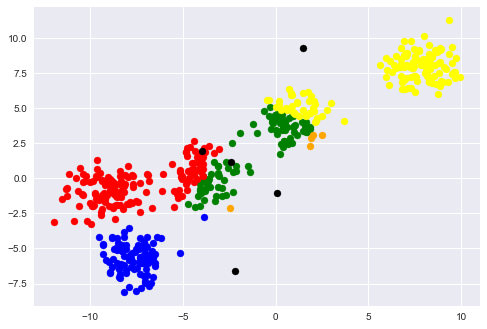

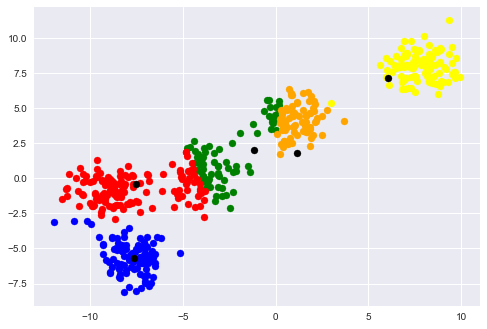

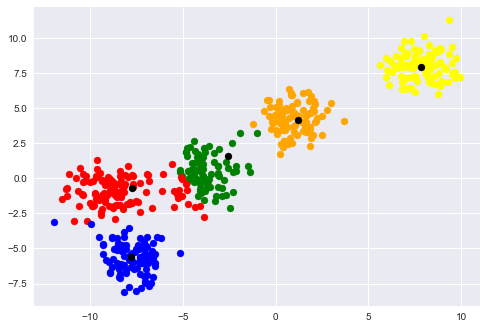

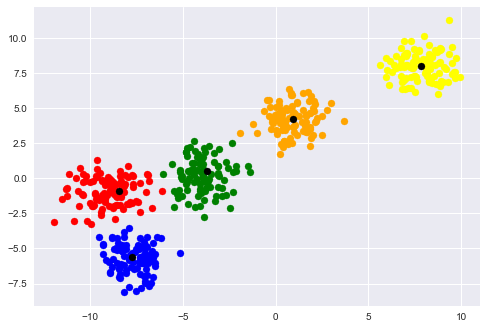

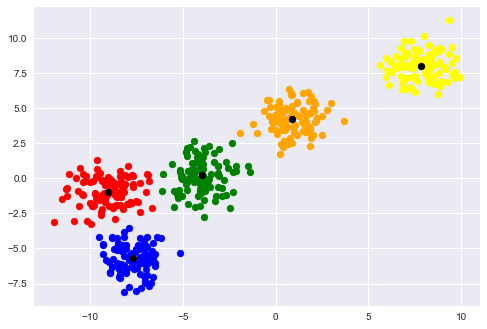

In [11]:
for i in range(5):
    assignToClusters(clusters)
    plotClusters(clusters)
    updateClusters(clusters)